In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv('flights.csv', dtype=str)
df_air = pd.read_csv('airlines.csv')
df_arp = pd.read_csv('airports.csv')
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [139]:
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.drop(columns=['YEAR', 'MONTH', 'DAY'])
cols = list(df.columns)
cols[-1:] + cols[:-1]
df = df[cols[-1:] + cols[:-1]]
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) &
            (df.DESTINATION_AIRPORT.apply(len) == 3)]


1. Найдем как связаны среднее время задержки вылета с днём недели

In [140]:
df = df.loc[~df[['DEPARTURE_DELAY']].isna().any(axis=1)]
df.DEPARTURE_DELAY = df.DEPARTURE_DELAY.astype(float)
days = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df['DAY_OF_WEEK'] = df.DAY_OF_WEEK.astype(float)
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].apply(lambda x: days[x])
tmp = df.groupby('DAY_OF_WEEK').agg({"DEPARTURE_DELAY": "mean", })

In [141]:
df[df.DEPARTURE_DELAY < 0].DEPARTURE_DELAY.sort_values() # странные какие-то отрицательные задержки, удалим их

1467349   -68.0
697022    -61.0
2433467   -52.0
397316    -48.0
270990    -47.0
           ... 
1188374    -1.0
2623384    -1.0
304601     -1.0
1920303    -1.0
1283505    -1.0
Name: DEPARTURE_DELAY, Length: 1581102, dtype: float64

In [142]:
df = df[df.DEPARTURE_DELAY > 0]

In [143]:
x = list(days.values())
x = list(map(lambda x: x[:3], x))
y = list([tmp.loc['Monday'].DEPARTURE_DELAY, tmp.loc['Tuesday'].DEPARTURE_DELAY, tmp.loc['Wednesday'].DEPARTURE_DELAY, tmp.loc['Thursday'].DEPARTURE_DELAY, tmp.loc['Friday'].DEPARTURE_DELAY, tmp.loc['Saturday'].DEPARTURE_DELAY, tmp.loc['Sunday'].DEPARTURE_DELAY])

Text(0.5, 0, 'day of week')

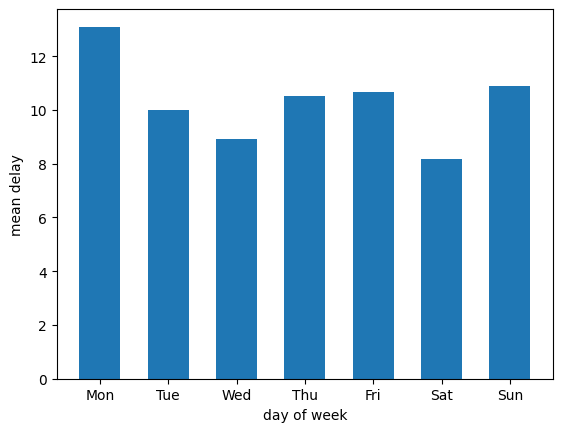

In [144]:
plt.bar(x, y, width = 0.6)
plt.ylabel('mean delay')
plt.xlabel('day of week')

In [145]:
df['DAY_OF_WEEK'].value_counts().sort_values()

DAY_OF_WEEK
Saturday     123960
Tuesday      152893
Wednesday    154748
Sunday       156001
Monday       173976
Friday       177453
Thursday     179598
Name: count, dtype: int64

Видим, что среднее время задержки вылета самое большое в понедельник, и увеличивается перед выходными.

---



2. Найдем 10 аэропортов с самыми долгими задержками вылета.

In [146]:
tmp = df.groupby('ORIGIN_AIRPORT').agg({"DEPARTURE_DELAY": "max"})
tmp = tmp.sort_values('DEPARTURE_DELAY', ascending=False)[:10]
x = tmp.index
y = tmp.DEPARTURE_DELAY

Text(0.5, 0, 'airoport')

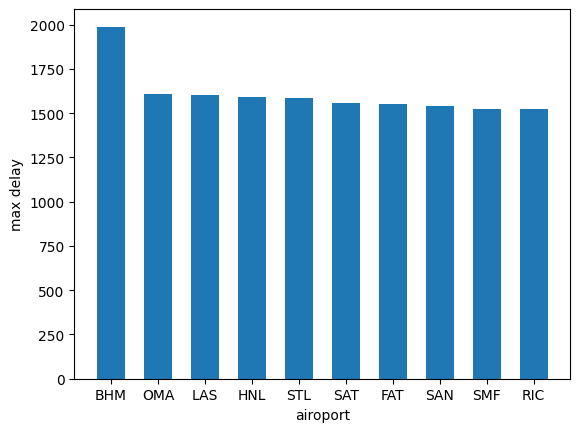

In [147]:
plt.bar(x, y, width = 0.6)
plt.ylabel('max delay')
plt.xlabel('airoport')

In [148]:
df_arp.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [149]:
df_arp[df_arp.IATA_CODE == 'BHM'].AIRPORT


31    Birmingham-Shuttlesworth International Airport
Name: AIRPORT, dtype: object

In [150]:
df[df.ORIGIN_AIRPORT == "BHM"].DEPARTURE_DELAY.mean()

39.58076062639821

Видим, что  в аэропорту 'Birmingham-Shuttlesworth International Airport' произошла самая долгая задержка вылета, и среднее время задержки у них не очень маленькое. Надо что-то отпимизировать.

3. Среднее время задержки у авиакомпаний

In [151]:
Airlines = df.AIRLINE.unique()

In [152]:
tmp = df.groupby('AIRLINE').agg({"DEPARTURE_DELAY": "mean", })

In [153]:
tmp = tmp.sort_values('DEPARTURE_DELAY', ascending=False)

Text(0.5, 0, 'airoport')

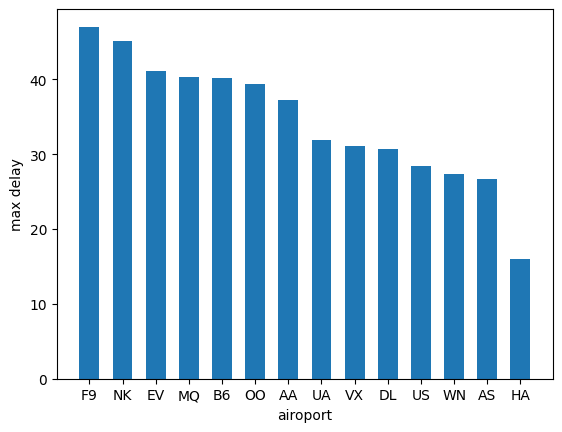

In [154]:
x = tmp.index
y = tmp.DEPARTURE_DELAY
plt.bar(x, y, width = 0.6)
plt.ylabel('max delay')
plt.xlabel('airoport')

In [155]:
df_air[df_air.IATA_CODE == 'F9'].AIRLINE
df_air[df_air.IATA_CODE == 'HA'].AIRLINE

11    Hawaiian Airlines Inc.
Name: AIRLINE, dtype: object

Видим, что хуже всего дела у 'Frontier Airlines Inc'. Лучше всех 'Hawaiian Airlines Inc'. По информации из интернета у  компании 'Hawaiian Airlines Inc' количество сотрудников больше примерно на 1000 человек, быть может это решает.

4. Распределение задержек вылета по аэропортам


In [156]:
tmp = df.groupby('ORIGIN_AIRPORT').agg({"DEPARTURE_DELAY": "count"}).sort_values('DEPARTURE_DELAY', ascending=False)

Text(0.5, 1.0, 'Топ 10 аэропортов с наибольшим количеством задержек вылета')

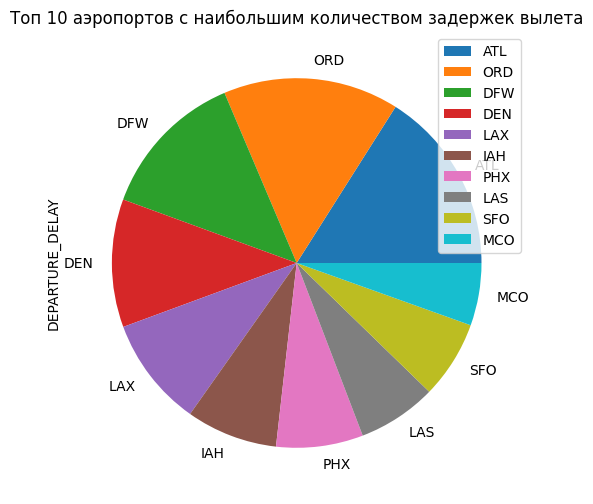

In [157]:
tmp.rename(columns={'DEPARTURE_DELAY': 'number of delays'})
tmp = tmp[:10]
tmp.plot(kind='pie', figsize=(10, 6), subplots=True)
plt.title('Топ 10 аэропортов с наибольшим количеством задержек вылета')

В топ 3 аэропорта по количеству задержек вылета входят: Hartsfield-Jackson Atlanta International Airport, Chicago O'Hare International Airport и Dallas/Fort Worth International Airport.

5. Проверим конкретный самолет

In [158]:
tmp = df.groupby('TAIL_NUMBER').agg({"DEPARTURE_DELAY": "count"}).sort_values('DEPARTURE_DELAY', ascending=False)

In [159]:
tmp.head()

,DEPARTURE_DELAY
TAIL_NUMBER,
N395SW,631
N645SW,616
N621SW,615
N352SW,613
N634SW,610


In [160]:
tail_number = 'N395SW'

In [161]:
x = df[df.TAIL_NUMBER == tail_number].shape[0]
y = df[(df.TAIL_NUMBER == tail_number) & (df.DEPARTURE_DELAY > 0) ].shape[0]

In [162]:
x == y

True

Странно, что у этого самолета все рейсы, которые попали в итоговую таблицу оказались с задержкой вылета, видимо пора менять самолет.